In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import quantstats as qs

In [2]:
btc = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [3]:
def data(datos, s, l):
    df = datos.copy()
    df["Return"] = df.Close / df.Close.shift(1)- 1
    df["SMAs"] = df.Close.rolling(s).mean()
    df["SMAl"] = df.Close.rolling(l).mean()
    df = df.iloc[198:]
    df = df.filter(["Date", "Close", "Return", "SMAs", "SMAl"], axis = 1)
    return df

In [4]:
df = data(btc, 50, 200)

In [5]:
df["largo"] = np.where(df.SMAs > df.SMAl, 1, 0)
df["Buy"] = (df.largo == 1) & (df.largo.shift(1) == 0)
df["Estrategia"] = df.Buy.shift(1) * df.Return
df

,Close,Return,SMAs,SMAl,largo,Buy,Estrategia
Date,,,,,,,
2015-04-03,254.322006,0.005205,259.208961,NaN,0,False,NaN
2015-04-04,253.697006,-0.002458,259.574362,310.843170,0,False,-0
2015-04-05,260.597992,0.027202,259.639901,309.859490,0,False,0
2015-04-06,255.492004,-0.019593,260.053241,309.014750,0,False,-0
2015-04-07,253.179993,-0.009049,260.439981,308.306670,0,False,-0
...,...,...,...,...,...,...,...
2021-07-11,34240.187500,0.021469,35639.747187,44478.597637,0,False,0
2021-07-12,33155.847656,-0.031669,35607.452500,44525.697129,0,False,-0
2021-07-13,32702.025391,-0.013688,35487.373398,44565.883301,0,False,-0


                           Strategy
-------------------------  ----------
Start Period               2015-04-03
End Period                 2021-07-15
Risk-Free Rate             0.0%
Time in Market             1.0%

Cumulative Return          -1.49%
CAGR%                      -0.24%

Sharpe                     -0.08
Sortino                    -0.09
Sortino/√2                 -0.07

Max Drawdown               -4.9%
Longest DD Days            812
Volatility (ann.)          1.89%
Calmar                     -0.05
Skew                       -18.56
Kurtosis                   1206.07

Expected Daily %           -0.0%
Expected Monthly %         -0.02%
Expected Yearly %          -0.21%
Kelly Criterion            -12.93%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.2%
Expected Shortfall (cVaR)  -0.2%

Gain/Pain Ratio            -0.24
Gain/Pain (1M)             -0.24

Payoff Ratio               1.13
Profit Factor              0.76
Common Sense Ratio         nan
CPC Index          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-04-25,2020-02-20,2021-07-15,812,-4.900852,-4.654296
2,2015-07-15,2015-07-15,2015-10-29,106,-0.568760,0.000000


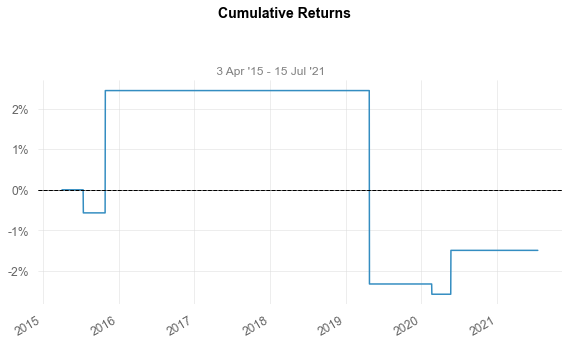

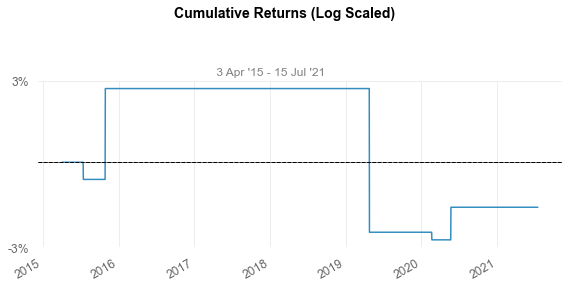

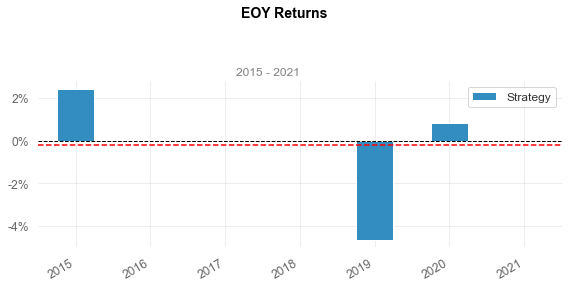

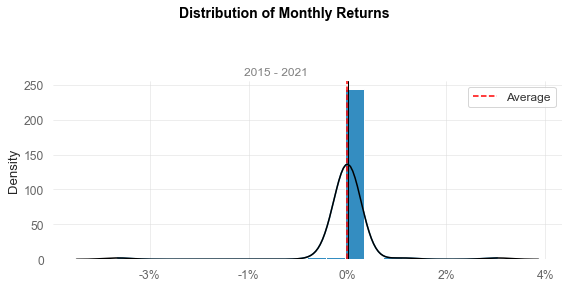

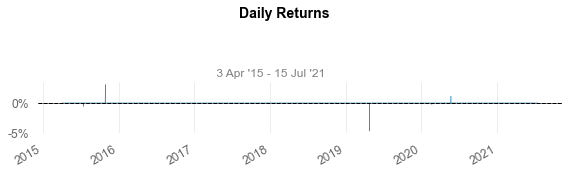

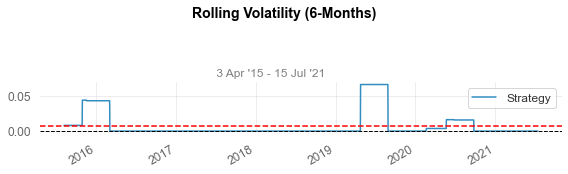

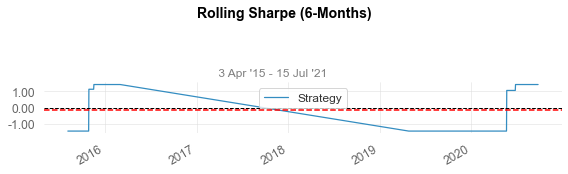

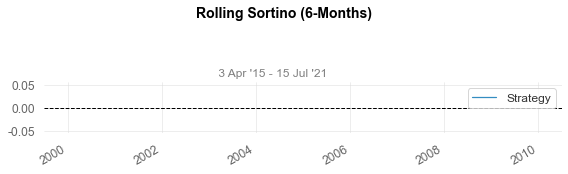

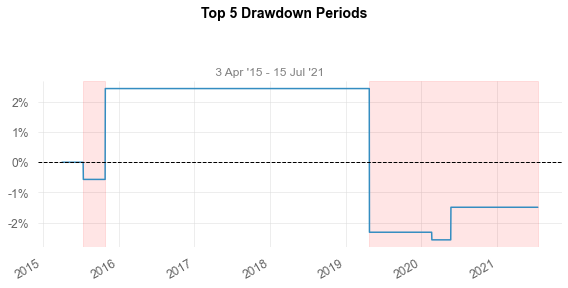

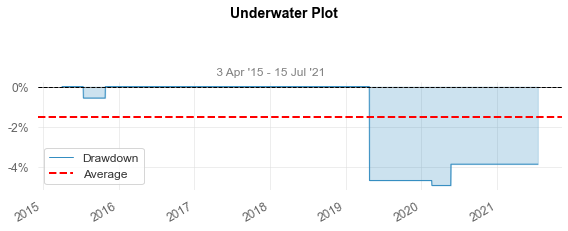

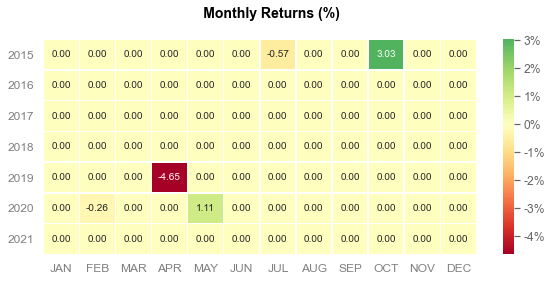

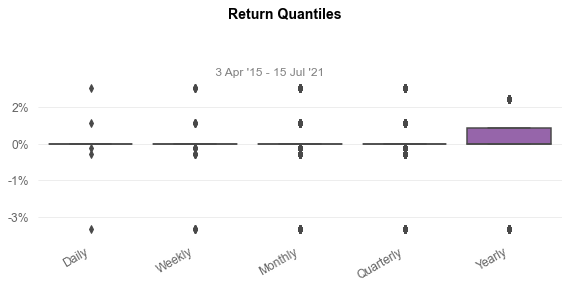

In [6]:
qs.reports.full(df.Estrategia)